G Pradyumn </br>
2018CSB1088


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score
from sklearn.cluster import KMeans

In [0]:
data = load_iris()

In [7]:
data #prints the fisher iris data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
flower = pd.DataFrame(data = data['data'])
new_flower = pd.DataFrame(data = data['data'])
new_flower.columns = data['feature_names']
flower.columns = data['feature_names']
flower["species"] = pd.DataFrame(data['target'])
target = pd.DataFrame(data = data['target'])
flower_name = pd.DataFrame(data['target_names'])

In [9]:
new_flower #see the features in data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
flower.shape  # 150 rows and 4 columns, means that we have 150 data points and 4 features

(150, 5)

In [11]:
target.shape #type of flower for each data point

(150, 1)

In [12]:
flower.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

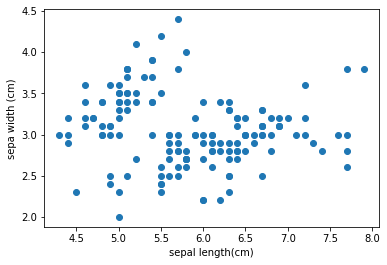

In [13]:
plt.scatter(x = flower['sepal length (cm)'], y = flower['sepal width (cm)'])
plt.xlabel("sepal length(cm)")
plt.ylabel('sepa width (cm)')
plt.show()

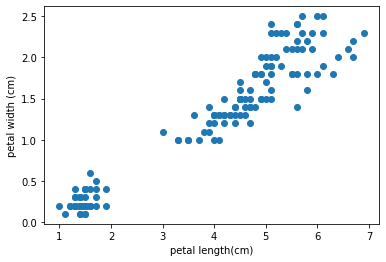

In [14]:
plt.scatter(x = flower['petal length (cm)'], y = flower['petal width (cm)'])
plt.xlabel("petal length(cm)")
plt.ylabel('petal width (cm)')
plt.show()

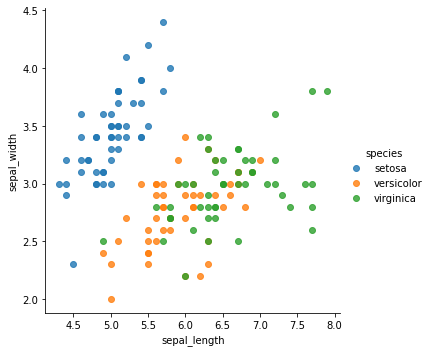

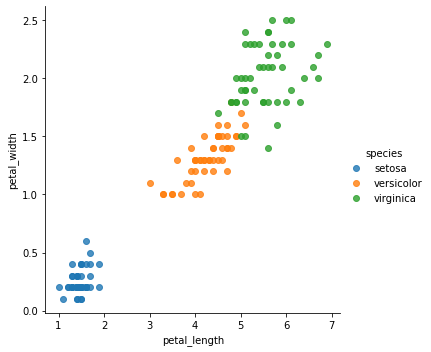

In [15]:
# if we use seaborn, we can color these points according to their species
import seaborn as sns
df = sns.load_dataset('iris')
sns.lmplot(x = "sepal_length", y = "sepal_width",data = df, hue = "species",fit_reg = False)
sns.lmplot(x = "petal_length", y= "petal_width", data = df, hue = "species", fit_reg = False)

Text(0.5, 0.98, '')

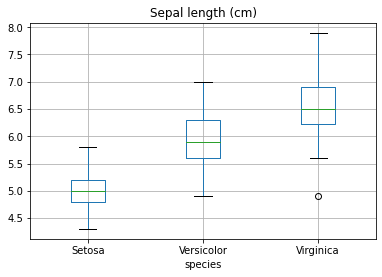

In [16]:
pos = (1,2,3)
ren = ("Setosa","Versicolor","Virginica")
flower.boxplot(column = 'sepal length (cm)', by = 'species')
plt.title("Sepal length (cm)")
plt.xticks(pos,ren)
plt.suptitle("")
# to understand boxplots -> https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51     

Text(0.5, 0.98, '')

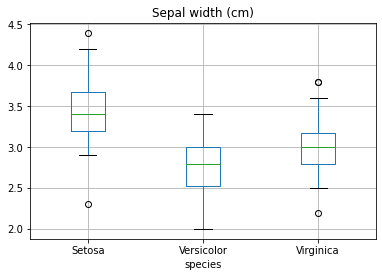

In [17]:
flower.boxplot(column = 'sepal width (cm)', by = 'species')
plt.title("Sepal width (cm)")
plt.xticks(pos,ren)
plt.suptitle("")

Text(0.5, 0.98, '')

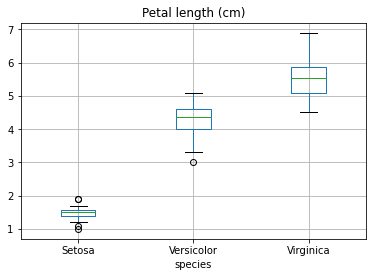

In [18]:
flower.boxplot(column = 'petal length (cm)', by = 'species')
plt.title("Petal length (cm)")
plt.xticks(pos,ren)
plt.suptitle("")

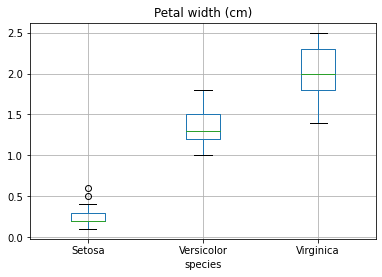

In [19]:
flower.boxplot(column = 'petal width (cm)', by = 'species')
plt.title("Petal width (cm)")
plt.xticks(pos,ren)
plt.suptitle("")
print("\n")
plt.show()
print("\n\n\n")

Gaussian Naive Bayes Classifier


In [0]:
def gaussian_classifier(training_data,testing_data,training_ans,testing_ans):
    clf = GaussianNB()
    clf.fit(training_data,np.ravel(training_ans))
    #since 1D array was needed, np.ravel is used to convert train_ans to a 1D array
    gaussian_predicted = clf.predict(testing_data)
    print("GNB Classifier\n")
    gaussian_matrix = pd.DataFrame(confusion_matrix(y_true = testing_ans,y_pred = gaussian_predicted))
    gaussian_matrix.columns = data['target_names']
    gaussian_matrix.index= data['target_names']
    display(gaussian_matrix)
    gaussian_report = (classification_report(testing_ans,gaussian_predicted,output_dict = True,target_names = data['target_names']))
    gaussian_df = pd.DataFrame(gaussian_report).transpose()
    print("\n")
    display(gaussian_df)
    print("\n Gaussian Classifier Accuracy : {} %".format(accuracy_score(testing_ans,gaussian_predicted)* 100))

Logistic Regression Classifier

In [0]:
def logistic_classifier(training_data,testing_data,training_ans,testing_ans):
    lg = LogisticRegression(max_iter=4000)
    lg.fit(training_data,np.ravel(training_ans))
    logistic_predicted = lg.predict(testing_data)
    print("Logistic Classifier\n")
    logistic_matrix = pd.DataFrame(confusion_matrix(testing_ans,logistic_predicted))
    logistic_matrix.columns = data['target_names']
    logistic_matrix.index= data['target_names']
    display(logistic_matrix)
    print("\n")
    logistic_report = (classification_report(testing_ans,logistic_predicted,output_dict = True,target_names = data['target_names']))
    logistic_df = pd.DataFrame(logistic_report).transpose()
    display(logistic_df)
    print("\n Logistic Classifier Accuracy : {} %".format(accuracy_score(testing_ans,logistic_predicted) * 100))

K Means classifier

In [0]:
def gaussian_classifier_no_labels(training_data_gaussian,testing_data_gaussian,training_ans_gaussian,testing_ans_gaussian):
    clf = GaussianNB()
    clf.fit(training_data_gaussian,np.ravel(training_ans_gaussian))
    #since 1D array was needed, np.ravel is used to convert train_ans to a 1D array
    gaussian_predicted = clf.predict(testing_data_gaussian)
    print("K-Means + GNB Classifier\n")
    gaussian_matrix = pd.DataFrame(confusion_matrix(y_true = testing_ans_gaussian,y_pred = gaussian_predicted))
    display(gaussian_matrix)
    gaussian_report = (classification_report(testing_ans_gaussian,gaussian_predicted,output_dict = True))
    gaussian_df = pd.DataFrame(gaussian_report).transpose()
    print("\n")
    display(gaussian_df)
    print("\n K-Means + Gaussian Classifier Accuracy : {} %".format(accuracy_score(testing_ans_gaussian,gaussian_predicted) * 100))

In [0]:
def logistic_classifier_no_labels(training_data_logistic,testing_data_logistic,training_ans_logistic,testing_ans_logistic):
    lg = LogisticRegression(max_iter=4000)
    lg.fit(training_data_logistic,np.ravel(training_ans_logistic))
    logistic_predicted = lg.predict(testing_data_logistic)
    print("K-means clustering + Logistic Classifier\n")
    logistic_matrix = pd.DataFrame(confusion_matrix(testing_ans_logistic,logistic_predicted))
    display(logistic_matrix)
    print("\n")
    logistic_report = (classification_report(testing_ans_logistic,logistic_predicted,output_dict = True))
    logistic_df = pd.DataFrame(logistic_report).transpose()
    display(logistic_df)
    print("\n K-Means + Logistic Classifier Accuracy : {} %".format(accuracy_score(testing_ans_logistic,logistic_predicted )*100))

In [0]:
def kmeans_cluster(training_data,testing_data,training_ans,testing_ans):
    km = KMeans(n_clusters = 3).fit(training_data)
    km_predicted = km.predict(testing_data)
    center = km.cluster_centers_ #stores the centers of different clusters
    plot_data(center)
    y_train_labels = np.array(km.labels_)
    kmeans_predicted = np.array(y_train_labels)
    y_test_labels = km.predict(testing_data)
    temp = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(len(y_train_labels)):
        u =  y_train_labels[i]
        v = train_ans[i][0]
        temp[u][v] +=1
    change = [0,0,0]
    for i in range(3):
        mx = 0
        for j in range(3):
            if (mx<temp[i][j]):
                mx = temp[i][j];
                change[i] = j
    for i in range(len(y_test_labels)):
        y_test_labels[i] = change[y_test_labels[i]]
    print("K-means Classifier\n")
    kmeans_matrix = pd.DataFrame(confusion_matrix(testing_ans,y_test_labels))
    kmeans_matrix.columns = data['target_names']
    kmeans_matrix.index = data['target_names']
    display(kmeans_matrix)
    kmeans_report = (classification_report(testing_ans,y_test_labels,output_dict = True,target_names = data['target_names']))
    kmeans_df = pd.DataFrame(kmeans_report).transpose()
    print("\n")
    display(kmeans_df)
    print("\n K-Means Classifier Accuracy : {} %".format(accuracy_score(testing_ans,y_test_labels)* 100))

In [0]:
def plot_data(centers):
    #creating new data points for centroids    
    df = sns.load_dataset('iris')
    new_data1 = [{'sepal_length':centers[0][0],'sepal_width':centers[0][1],'petal_length':centers[0][2],'petal_width':centers[0][3],'species':'centroids'}]
    new_data2 = [{'sepal_length':centers[1][0],'sepal_width':centers[1][1],'petal_length':centers[1][2],'petal_width':centers[1][3],'species':'centroids'}]
    new_data3 = [{'sepal_length':centers[2][0],'sepal_width':centers[2][1],'petal_length':centers[2][2],'petal_width':centers[2][3],'species':'centroids'}]
    df = df.append(new_data1,ignore_index = True)
    df = df.append(new_data2,ignore_index=True)
    df = df.append(new_data3,ignore_index=True)
    #sepal length vs sepal width 
    plt.scatter(x = flower['sepal length (cm)'], y = flower['sepal width (cm)'])
    plt.scatter(centers[0][0],centers[0][1],color = 'black')
    plt.scatter(centers[1][0],centers[1][1],color = 'black')
    plt.scatter(centers[2][0],centers[2][1],color = 'black')
    plt.xlabel("sepal length(cm)")
    plt.ylabel('sepal width (cm)')
    plt.show()
    sns.lmplot(x="sepal_length",y = "sepal_width",data = df, hue = "species",fit_reg = False)
    plt.show()
    #petal length vs petal width
    plt.scatter(x = flower['petal length (cm)'], y = flower['petal width (cm)'])
    plt.scatter(centers[0][2],centers[0][3],color = 'black')
    plt.scatter(centers[1][2],centers[1][3],color = 'black')
    plt.scatter(centers[2][2],centers[2][3],color = 'black')
    plt.xlabel("petal length(cm)")
    plt.ylabel('petal width (cm)')
    plt.show()
    sns.lmplot(x="petal_length",y = "petal_width",data = df, hue = "species",fit_reg = False)
    plt.show()

GNB Classifier



,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,9,2
virginica,0,0,10


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,9.000000
versicolor,1.000000,0.818182,0.900000,11.000000
virginica,0.833333,1.000000,0.909091,10.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.944444,0.939394,0.936364,30.000000
weighted avg,0.944444,0.933333,0.933030,30.000000



 Gaussian Classifier Accuracy : 93.33333333333333 %
Logistic Classifier



,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,9,2
virginica,0,0,10


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,9.000000
versicolor,1.000000,0.818182,0.900000,11.000000
virginica,0.833333,1.000000,0.909091,10.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.944444,0.939394,0.936364,30.000000
weighted avg,0.944444,0.933333,0.933030,30.000000



 Logistic Classifier Accuracy : 93.33333333333333 %


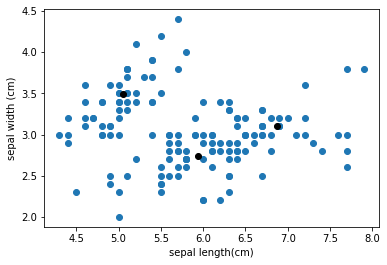

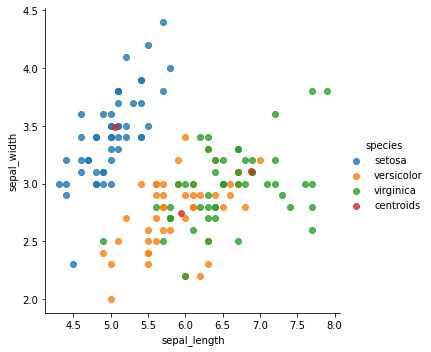

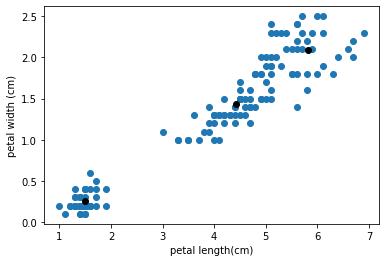

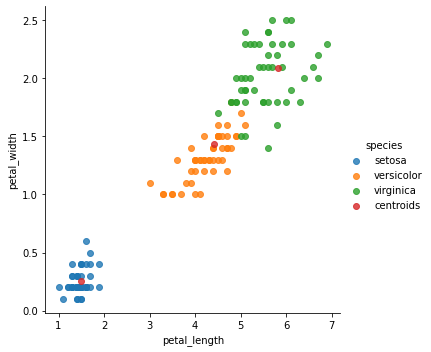

K-means Classifier



,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,9,2
virginica,0,1,9


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,9.0
versicolor,0.900000,0.818182,0.857143,11.0
virginica,0.818182,0.900000,0.857143,10.0
accuracy,0.900000,0.900000,0.900000,0.9
macro avg,0.906061,0.906061,0.904762,30.0
weighted avg,0.902727,0.900000,0.900000,30.0



 K-Means Classifier Accuracy : 90.0 %
GNB Classifier



,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,12,1
virginica,0,0,9


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,8.000000
versicolor,1.000000,0.923077,0.960000,13.000000
virginica,0.900000,1.000000,0.947368,9.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.974359,0.969123,30.000000
weighted avg,0.970000,0.966667,0.966877,30.000000



 Gaussian Classifier Accuracy : 96.66666666666667 %
Logistic Classifier



,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,12,1
virginica,0,0,9


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,8.000000
versicolor,1.000000,0.923077,0.960000,13.000000
virginica,0.900000,1.000000,0.947368,9.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.974359,0.969123,30.000000
weighted avg,0.970000,0.966667,0.966877,30.000000



 Logistic Classifier Accuracy : 96.66666666666667 %


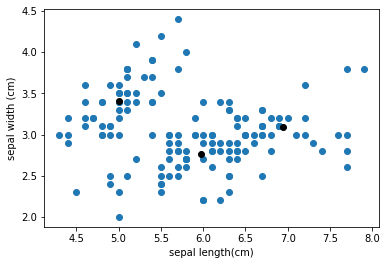

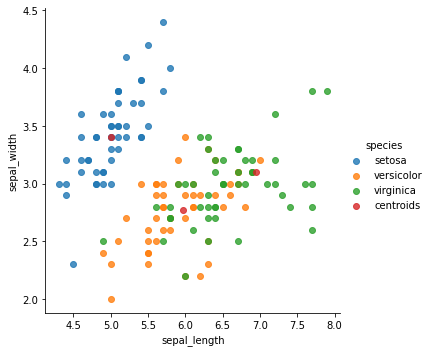

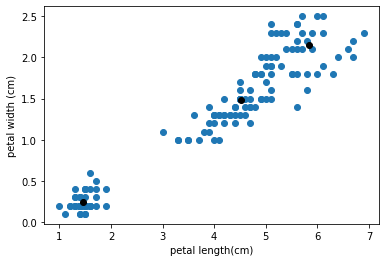

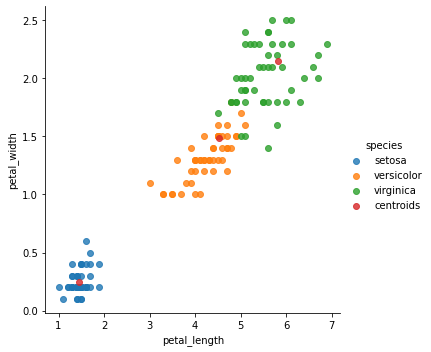

K-means Classifier



,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,13,0
virginica,0,0,9


,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,8.0
versicolor,1.0,1.0,1.0,13.0
virginica,1.0,1.0,1.0,9.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0



 K-Means Classifier Accuracy : 100.0 %
GNB Classifier



,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,9,0
virginica,0,1,12


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,8.000000
versicolor,0.900000,1.000000,0.947368,9.000000
virginica,1.000000,0.923077,0.960000,13.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.974359,0.969123,30.000000
weighted avg,0.970000,0.966667,0.966877,30.000000



 Gaussian Classifier Accuracy : 96.66666666666667 %
Logistic Classifier



,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,9,0
virginica,0,0,13


,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,8.0
versicolor,1.0,1.0,1.0,9.0
virginica,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0



 Logistic Classifier Accuracy : 100.0 %


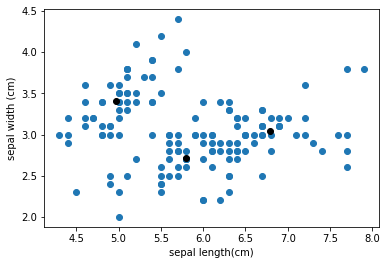

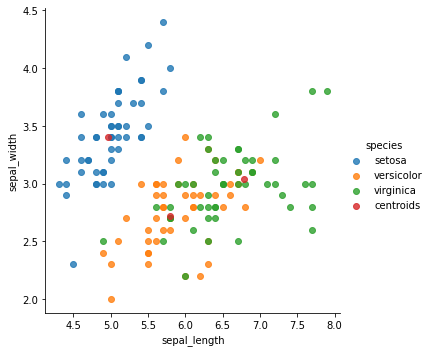

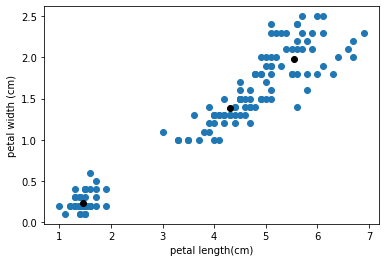

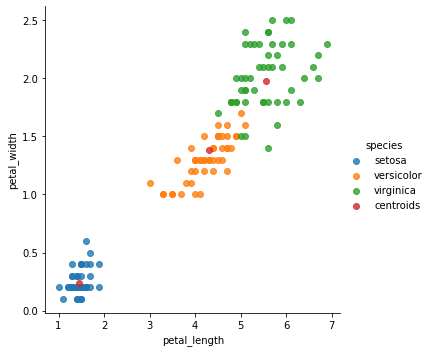

K-means Classifier



,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,9,0
virginica,0,3,10


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,8.0
versicolor,0.750000,1.000000,0.857143,9.0
virginica,1.000000,0.769231,0.869565,13.0
accuracy,0.900000,0.900000,0.900000,0.9
macro avg,0.916667,0.923077,0.908903,30.0
weighted avg,0.925000,0.900000,0.900621,30.0



 K-Means Classifier Accuracy : 90.0 %
GNB Classifier



,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,7,0
virginica,0,1,12


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,10.000000
versicolor,0.875000,1.000000,0.933333,7.000000
virginica,1.000000,0.923077,0.960000,13.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.958333,0.974359,0.964444,30.000000
weighted avg,0.970833,0.966667,0.967111,30.000000



 Gaussian Classifier Accuracy : 96.66666666666667 %
Logistic Classifier



,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,7,0
virginica,0,2,11


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,10.000000
versicolor,0.777778,1.000000,0.875000,7.000000
virginica,1.000000,0.846154,0.916667,13.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.925926,0.948718,0.930556,30.000000
weighted avg,0.948148,0.933333,0.934722,30.000000



 Logistic Classifier Accuracy : 93.33333333333333 %


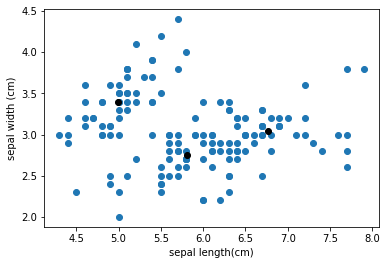

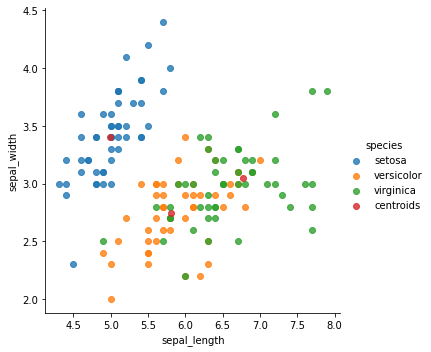

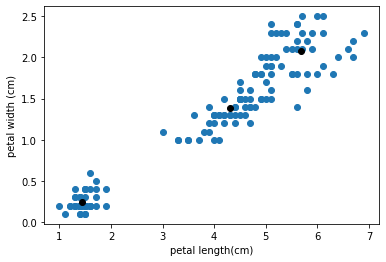

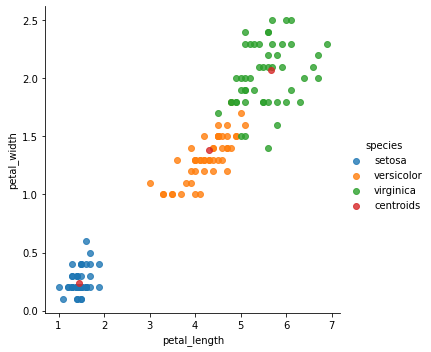

K-means Classifier



,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,7,0
virginica,0,5,8


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,10.000000
versicolor,0.583333,1.000000,0.736842,7.000000
virginica,1.000000,0.615385,0.761905,13.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.861111,0.871795,0.832916,30.000000
weighted avg,0.902778,0.833333,0.835422,30.000000



 K-Means Classifier Accuracy : 83.33333333333334 %
GNB Classifier



,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,10,0
virginica,0,1,4


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.909091,1.000000,0.952381,10.000000
virginica,1.000000,0.800000,0.888889,5.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.969697,0.933333,0.947090,30.000000
weighted avg,0.969697,0.966667,0.965608,30.000000



 Gaussian Classifier Accuracy : 96.66666666666667 %
Logistic Classifier



,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,10,0
virginica,0,1,4


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.909091,1.000000,0.952381,10.000000
virginica,1.000000,0.800000,0.888889,5.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.969697,0.933333,0.947090,30.000000
weighted avg,0.969697,0.966667,0.965608,30.000000



 Logistic Classifier Accuracy : 96.66666666666667 %


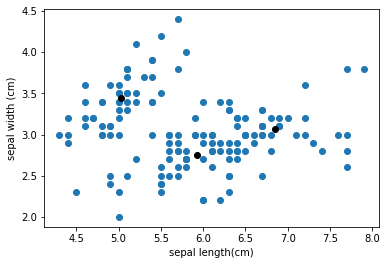

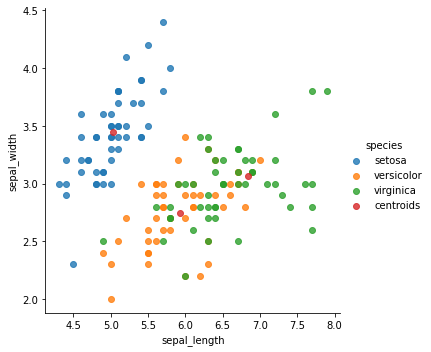

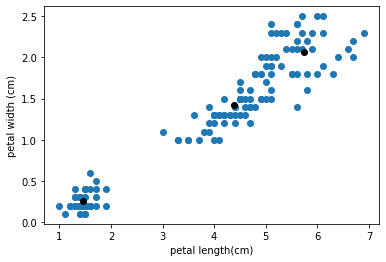

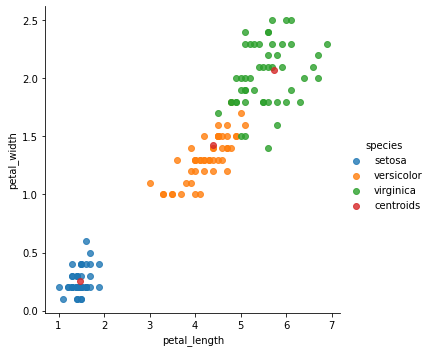

K-means Classifier



,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,10,0
virginica,0,3,2


,precision,recall,f1-score,support
setosa,1.000000,1.0,1.000000,15.0
versicolor,0.769231,1.0,0.869565,10.0
virginica,1.000000,0.4,0.571429,5.0
accuracy,0.900000,0.9,0.900000,0.9
macro avg,0.923077,0.8,0.813665,30.0
weighted avg,0.923077,0.9,0.885093,30.0



 K-Means Classifier Accuracy : 90.0 %


In [105]:
#partitioning of data is done here
#all the models are called from here
kf = KFold(n_splits = 5, shuffle = True)
for train_ind,test_ind in kf.split(flower):
  train_data = [new_flower.iloc[i] for i in train_ind]
  train_ans = np.array([target.iloc[i] for i in train_ind])
  test_data = [new_flower.iloc[i] for i in test_ind]
  test_ans = np.array([target.iloc[i] for i in test_ind])
  gaussian_classifier(train_data,test_data,train_ans,test_ans)
  logistic_classifier(train_data,test_data,train_ans,test_ans)
  kmeans_cluster(train_data,test_data,train_ans,test_ans)